# Exploratory Data Analysis in Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jupyterthemes.jtplot as jtplot
import seaborn as sns
%matplotlib inline
jtplot.style(theme='onedork')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#PMF/CDF" data-toc-modified-id="PMF/CDF-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>PMF/CDF</a></span></li><li><span><a href="#Modeling-distributions" data-toc-modified-id="Modeling-distributions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Modeling distributions</a></span></li><li><span><a href="#Relationships" data-toc-modified-id="Relationships-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Relationships</a></span></li><li><span><a href="#Computing-correlations" data-toc-modified-id="Computing-correlations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Computing correlations</a></span></li><li><span><a href="#Simple-regression" data-toc-modified-id="Simple-regression-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Simple regression</a></span><ul class="toc-item"><li><span><a href="#statsmodels" data-toc-modified-id="statsmodels-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>statsmodels</a></span></li></ul></li><li><span><a href="#Multiple-regression" data-toc-modified-id="Multiple-regression-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Multiple regression</a></span></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Logistic regression</a></span></li></ul></div>

## PMF/CDF
- PMF
    - Probability Mass Function
- PDF
    - Probability Dense Function
- Cumulative Distribution Function

In [2]:
from empiricaldist import Pmf

In [3]:
gss= pd.read_hdf('gss.hdf5')

           age
85.0  0.002360
86.0  0.001927
87.0  0.001702
88.0  0.001413
89.0  0.003773


/Users/ellick/anaconda3/envs/datacamp/lib/python3.7/site-packages/pandas/core/indexes/base.py:111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = op(self.values, np.asarray(other))


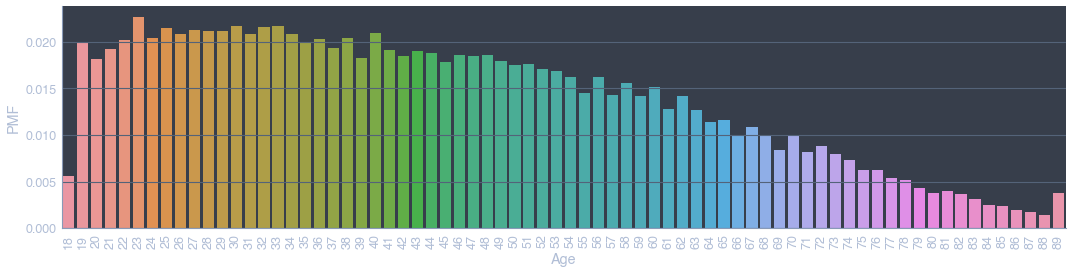

In [4]:
# Compute the PMF for year
pmf_age = gss.age.value_counts(normalize=True).sort_index()
pmf_age = pd.DataFrame(pmf_age)
# Print the result
print(pmf_age.tail())

# Plot the PMF
sns.catplot(x = pmf_age.index.astype(int), y ='age',
            data=pmf_age,
            kind="bar",
            height=5,
            aspect=3)

# Label the axes
plt.xticks(rotation=90)
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

In [5]:
cdf_age = pmf_age.age.cumsum()
print(cdf_age.loc[30])

0.2539137136526388


iqr= 29676.0


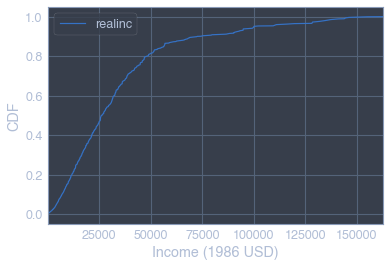

In [6]:
iqr_income = gss.realinc.quantile(0.75) - gss.realinc.quantile(0.25)
print('iqr=', iqr_income)
cdf_income = gss.realinc.value_counts(normalize=True).sort_index().cumsum()
cdf_income = pd.DataFrame(cdf_income)

cdf_income.plot()
# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.show()

## Modeling distributions
- PDF

4.371148677934171 0.4290082383271385


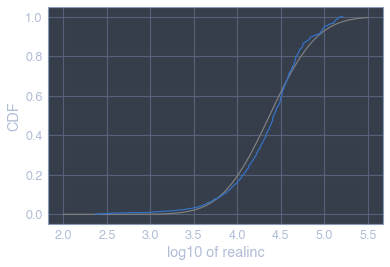

In [7]:
from scipy.stats import norm

# Extract realinc and compute its log
income = gss['realinc']
log_income = income.agg(np.log10)

# Compute mean and standard deviation
# Make a norm object
mean = log_income.mean()
std = log_income.std()
print(mean, std)
dist = norm(mean, std)

# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# # Create and plot the Cdf of log_income
cdf_log_income = log_income.value_counts(normalize=True).sort_index().cumsum()
cdf_log_income = pd.DataFrame(cdf_log_income)
plt.plot(cdf_log_income.index, cdf_log_income.realinc)


# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
# plt.legend(['Evaluated', 'CDF'])
plt.show()

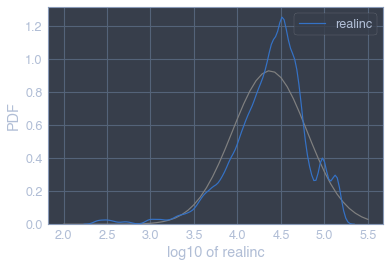

In [13]:
# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(log_income)

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()

## Relationships

In [14]:
brfss= pd.read_hdf('brfss.hdf5')

In [15]:
brfss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 96230 to 379327
Data columns (total 9 columns):
SEX         99938 non-null float64
HTM4        95143 non-null float64
WTKG3       93404 non-null float64
INCOME2     83447 non-null float64
_LLCPWT     100000 non-null float64
_AGEG5YR    98794 non-null float64
_VEGESU1    87713 non-null float64
_HTMG10     95143 non-null float64
AGE         98794 non-null float64
dtypes: float64(9)
memory usage: 7.6 MB


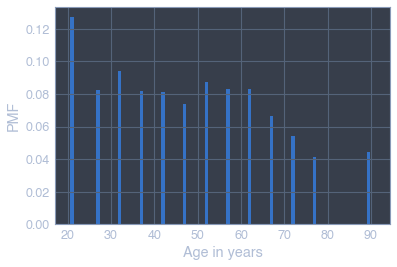

In [109]:
# Extract age
age = brfss.AGE

# Plot the PMF
pmf_age = age.dropna().value_counts(normalize=True).sort_index()
pmf_age = pd.DataFrame(pmf_age)

pmf_dict = {}
for x in np.arange(21, 91, 0.5):
    pmf_dict[x] = 0
    if x in pmf_age.index:
        pmf_dict[x] = pmf_age.loc[x,'AGE']

plt.bar(x=pmf_dict.keys(), height=pmf_dict.values())


# Label the axes
# plt.xticks(ticks= np.arange(21, 90))
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.show()

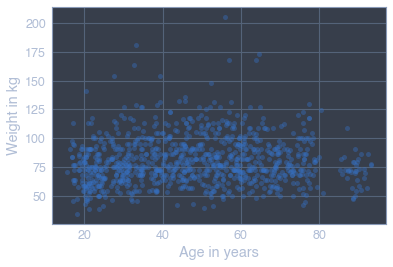

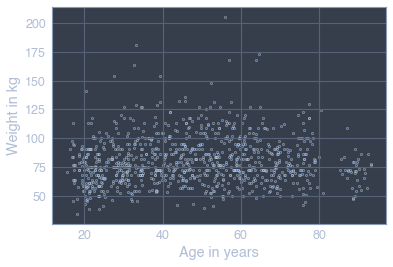

In [126]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Add jittering to age
age = brfss['AGE'] +  np.random.normal(0, 2.5, size=len(brfss))
# Extract weight
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', alpha=0.4, ms=5)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

# x_jitter=True , 現在沒用
sns.scatterplot(x=age, y=weight, alpha=0.4, s=5)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

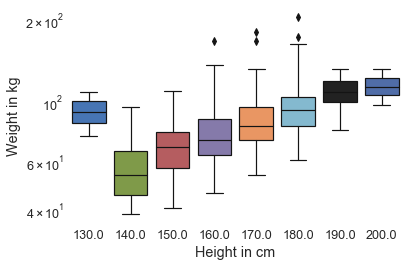

In [135]:
# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])
sns.set_style('white')
# Make a box plot
sns.boxplot(data=data, x='_HTMG10', y='WTKG3', whis=3)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()


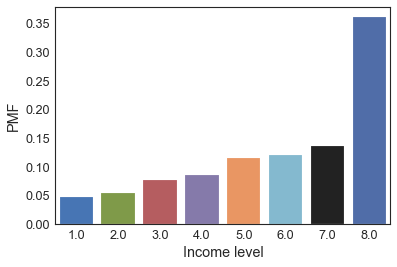

In [148]:
# Extract income
income = brfss.INCOME2.dropna()

# Plot the PMF
pmf_income_lv = income.value_counts(normalize=True).sort_index()
sns.barplot(x = pmf_income_lv.index, y=pmf_income_lv.values)
# # Label the axes
plt.xlabel('Income level')
plt.ylabel('PMF')
plt.show()

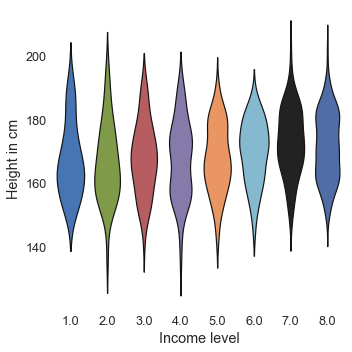

In [149]:
# Drop rows with missing data
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.catplot(data=data, x='INCOME2', y='HTM4', kind='violin', inner=None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()

## Computing correlations
- Correlation between income and vegetable consumption is about 0.12.
    - People with higher incomes eat more vegetables.
- The correlation between age and vegetable consumption is about -0.01.
    - There could be a strong nonlinear relationship between age and vegetable consumption.




              AGE   _HTMG10     WTKG3
AGE      1.000000 -0.097568  0.051345
_HTMG10 -0.097568  1.000000  0.498575
WTKG3    0.051345  0.498575  1.000000


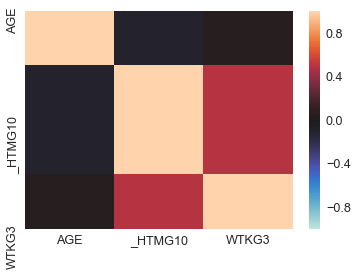

In [184]:
# Select columns
columns = ['AGE', '_HTMG10', 'WTKG3']
subset = brfss[columns]

# Compute the correlation matrix
print(subset.corr())

sns.heatmap(subset.corr(), center=0, vmax=1, vmin=-1)

## Simple regression

In [186]:
from scipy.stats import linregress

# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset.INCOME2
ys = subset._VEGESU1

# Compute the linear regression
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.07000027412424817, intercept=1.5413758521321232, rvalue=0.11526352353306703, pvalue=0.0015115444024927935, stderr=0.021983967667553426)


<Figure size 432x288 with 0 Axes>

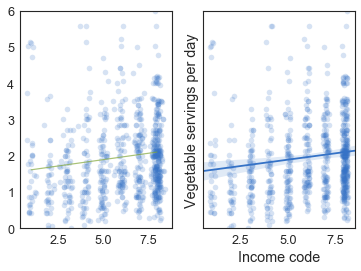

In [187]:
plt.clf()
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True)
# Plot the scatter plot
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
ax1.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([np.min(xs), np.max(xs)])
fy = res.intercept + res.slope*fx
ax1.plot(fx, fy, '-', alpha=0.7)
# ax1.set_xlabel('Income code')

sns.regplot(data=subset,
            x='INCOME2', y='_VEGESU1',
            x_jitter=0.15,
            scatter_kws={'alpha':0.2},
            ax=ax2)


plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()

### statsmodels

In [189]:
from scipy.stats import linregress
import statsmodels.formula.api as smf

# Run regression with linregress
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs,ys)
print(res)

# Run regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data = brfss).fit()
print(results.params)

LinregressResult(slope=0.07000027412424817, intercept=1.5413758521321232, rvalue=0.11526352353306703, pvalue=0.0015115444024927935, stderr=0.021983967667553426)
Intercept    1.541376
INCOME2      0.070000
dtype: float64


## Multiple regression

In [192]:
gss= pd.read_hdf('gss.hdf5')
gss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62466 entries, 0 to 62465
Data columns (total 10 columns):
year       62466 non-null int64
age        62281 non-null float64
cohort     62282 non-null float64
sex        62466 non-null int64
race       62466 non-null int64
educ       62304 non-null float64
realinc    55499 non-null float64
gunlaw     40550 non-null float64
grass      36222 non-null float64
wtssall    62466 non-null float64
dtypes: float64(7), int64(3)
memory usage: 5.2 MB


<Figure size 432x288 with 0 Axes>

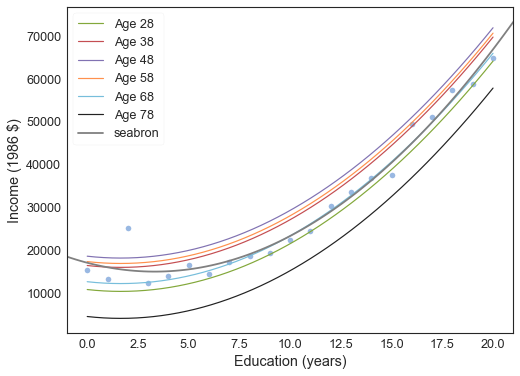

In [232]:
import statsmodels.formula.api as smf
plt.clf()
plt.figure(figsize=(8,6))
# Group by educ
# Compute mean income in each group
mean_income_by_educ = gss.groupby('educ').realinc.mean()
# Plot mean income as a scatter plot
plt.plot(mean_income_by_educ, 'o', alpha=0.5)

# Add a new column with educ squared
gss['educ2'] = gss.educ **2
gss['age2'] = gss.age **2
# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Make a DataFrame for predic
df = pd.DataFrame()
df['educ'] = np.linspace(0,20)
df['educ2'] = df['educ']**2
for i in range(2,8):
    df['age'] = i*10 + 8
    df['age2'] = df['age']**2
    # Plot the predictions
    pred = results.predict(df)
    plt.plot(df['educ'], pred, label=f'Age {i*10 +8}')

# Plot with seabron
sns.regplot(data=pd.DataFrame(mean_income_by_educ).reset_index(),
            x='educ', y='realinc',
            scatter=False,
            order=2, label='seabron', ci=None, color='gray')
# Label the axes

plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

## Logistic regression


Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


<Figure size 432x288 with 0 Axes>

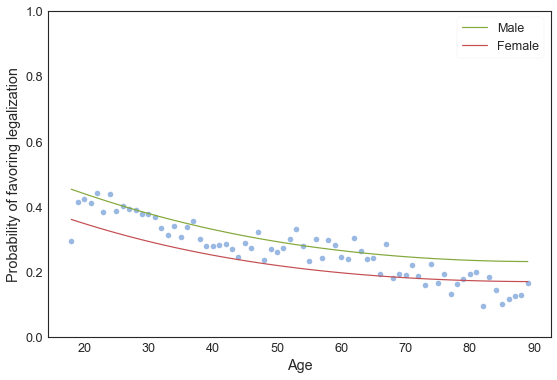

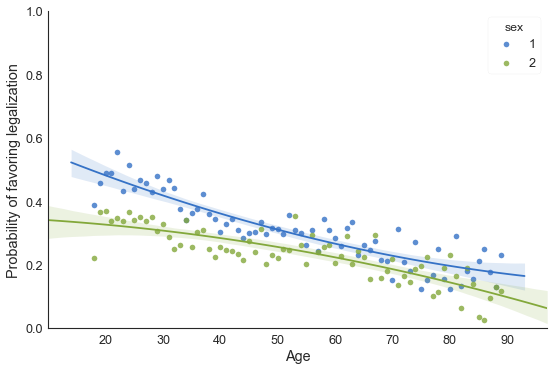

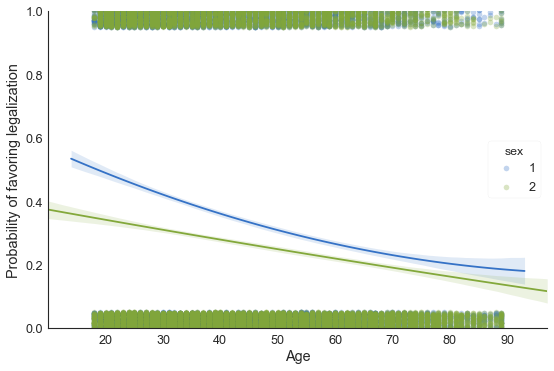

In [276]:
plt.clf()

plt.figure(figsize=(9,6))
# Recode grass
gss['grass'].replace(2, 0, inplace=True)

###
# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
# results.params
####
# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

favor_by_age = gss.groupby('age').grass.mean()
plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')
plt.ylim(0,1)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')

# by sns, data=grass.mean
grass_mean = pd.DataFrame(gss.groupby(['age', 'sex']).grass.mean()).reset_index()

sns.lmplot(data=grass_mean,
           x='age', y='grass', hue='sex',
           order=2, height=5.2, aspect=1.5, legend_out=False)
plt.ylim(0,1)
plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')

# by sns, data=origin
gss.dropna(subset=['grass'])
sns.lmplot(data=gss.dropna(subset=['grass']),
           x='age', y='grass', hue='sex', order=2,
           y_jitter=0.05, height=5.2, aspect=1.5,
           scatter_kws={'alpha':0.3}, legend_out=False)
plt.ylim(0,1)
plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')

plt.show()